# Assignment 3 specification

The purpose of this assignment is to analyse the factors that might lead to (increased) consumption of both legal and illegal drugs. The data set is hosted on the UCI repository of datasets for machine learning.

The dataset is provided with this notebook as a zip file.

For your conveninece, code is provide below to read the data into the dataframe, and this notebook is setup so that students ar prompted to complete the tasks.


# Here is some code to help you get started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#factors = ['neuroticism', 'extroversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsivity', 'sensation', 'education', 'age', 'gender', 'country', 'ethnicity']
#targets = ['alcohol', 'amphetamines', 'amyl_nitrate', 'benzodiazepine', 'cannabis', 'chocolate', 'cocaine', 'caffeine', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legal_highs', 'LSD', 'methadone', 'mushrooms', 'nicotine', 'semeron', 'volatile']
#colnames = factors
#colnames.extend(targets)
df = pd.read_csv('C:/Users/willi/OneDrive/Desktop/Data Mining/CA3/data/Drug_Consumption.csv', index_col=0)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# Task 1: Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction.

##Start of Answer 1##

First Pass

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1884 entries, 2 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   object 
 1   Gender     1884 non-null   object 
 2   Education  1884 non-null   object 
 3   Country    1884 non-null   object 
 4   Ethnicity  1884 non-null   object 
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   AScore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   object 
 13  Amphet     1884 non-null   object 
 14  Amyl       1884 non-null   object 
 15  Benzos     1884 non-null   object 
 16  Caff       1884 non-null   object 
 17  Cannabis   1884 non-null   object 
 18  Choc       1884 non-null   object 
 19  Coke       1884 non-null   object 
 20  Crack   

In [4]:
X = df.drop(['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], axis=1)
y = df.drop(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Amphet', 'Amyl', 'Benzos','Ecstasy', 'Meth', 'Ketamine', 'Legalh', 'LSD', 'Mushrooms', 'Semer', 'VSA'], axis=1)

In [5]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
ID,,,,,,,,,,,,
2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593


In [6]:
y

,Alcohol,Caff,Cannabis,Choc,Coke,Crack,Heroin,Nicotine
ID,,,,,,,,
2,CL5,CL6,CL4,CL6,CL3,CL0,CL0,CL4
3,CL6,CL6,CL3,CL4,CL0,CL0,CL0,CL0
4,CL4,CL5,CL2,CL4,CL2,CL0,CL0,CL2
5,CL4,CL6,CL3,CL6,CL0,CL0,CL0,CL2
6,CL2,CL6,CL0,CL4,CL0,CL0,CL0,CL6
...,...,...,...,...,...,...,...,...
1884,CL5,CL4,CL5,CL4,CL0,CL0,CL0,CL0
1885,CL5,CL5,CL3,CL4,CL0,CL0,CL0,CL5
1886,CL4,CL6,CL6,CL6,CL4,CL0,CL0,CL6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1507, 12)
X_test shape: (377, 12)
y_train shape: (1507, 8)
y_test shape: (377, 8)


In [8]:
print(X_train.describe())

            Nscore       Escore       Oscore       AScore       Cscore  \
count  1507.000000  1507.000000  1507.000000  1507.000000  1507.000000   
mean     -0.010473     0.013453    -0.003042     0.004589    -0.015193   
std       0.989665     1.004161     0.983388     0.983960     1.004759   
min      -2.756960    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.590420     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1507.000000  1507.000000  
mean      0.010895     0.004903  
std       0.961527     0.963026  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730  


In [9]:
print(y_train.describe())

       Alcohol  Caff Cannabis  Choc  Coke Crack Heroin Nicotine
count     1507  1507     1507  1507  1507  1507   1507     1507
unique       7     7        7     7     7     7      7        7
top        CL5   CL6      CL6   CL6   CL0   CL0    CL0      CL6
freq       604  1109      376   634   824  1298   1283      499


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 1207 to 1131
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1507 non-null   object 
 1   Gender     1507 non-null   object 
 2   Education  1507 non-null   object 
 3   Country    1507 non-null   object 
 4   Ethnicity  1507 non-null   object 
 5   Nscore     1507 non-null   float64
 6   Escore     1507 non-null   float64
 7   Oscore     1507 non-null   float64
 8   AScore     1507 non-null   float64
 9   Cscore     1507 non-null   float64
 10  Impulsive  1507 non-null   float64
 11  SS         1507 non-null   float64
dtypes: float64(7), object(5)
memory usage: 153.1+ KB


In [11]:
# List of columns to convert to categorical
columns_to_convert_X = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# Convert specified columns to categorical
X_train[columns_to_convert_X] = X_train[columns_to_convert_X].astype('category')

In [12]:
# Convert specified columns to categorical
X_test[columns_to_convert_X] = X_test[columns_to_convert_X].astype('category')

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 1207 to 1131
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        1507 non-null   category
 1   Gender     1507 non-null   category
 2   Education  1507 non-null   category
 3   Country    1507 non-null   category
 4   Ethnicity  1507 non-null   category
 5   Nscore     1507 non-null   float64 
 6   Escore     1507 non-null   float64 
 7   Oscore     1507 non-null   float64 
 8   AScore     1507 non-null   float64 
 9   Cscore     1507 non-null   float64 
 10  Impulsive  1507 non-null   float64 
 11  SS         1507 non-null   float64 
dtypes: category(5), float64(7)
memory usage: 102.9 KB


In [14]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 1207 to 1131
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Alcohol   1507 non-null   object
 1   Caff      1507 non-null   object
 2   Cannabis  1507 non-null   object
 3   Choc      1507 non-null   object
 4   Coke      1507 non-null   object
 5   Crack     1507 non-null   object
 6   Heroin    1507 non-null   object
 7   Nicotine  1507 non-null   object
dtypes: object(8)
memory usage: 106.0+ KB


In [15]:
# List of columns to convert to categorical
columns_to_convert_y = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Heroin', 'Nicotine']

# Convert specified columns to categorical
y_train[columns_to_convert_y] = y_train[columns_to_convert_y].astype('category')

In [16]:
# Convert specified columns to categorical
y_test[columns_to_convert_y] = y_test[columns_to_convert_y].astype('category')

In [17]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 1207 to 1131
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Alcohol   1507 non-null   category
 1   Caff      1507 non-null   category
 2   Cannabis  1507 non-null   category
 3   Choc      1507 non-null   category
 4   Coke      1507 non-null   category
 5   Crack     1507 non-null   category
 6   Heroin    1507 non-null   category
 7   Nicotine  1507 non-null   category
dtypes: category(8)
memory usage: 26.3 KB


In [18]:
X_train.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
dtype: int64

Second Pass

Count plots of all categorical features.

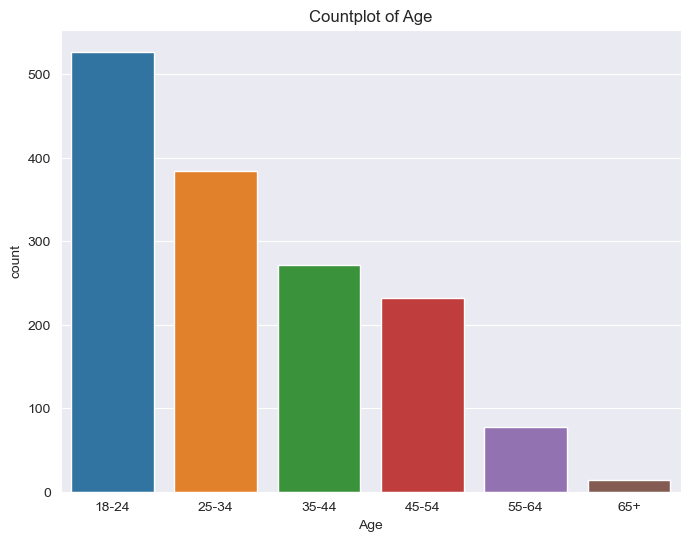

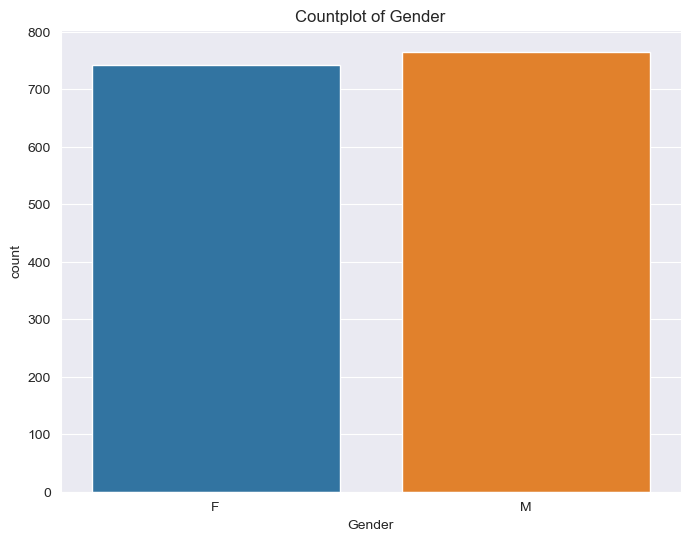

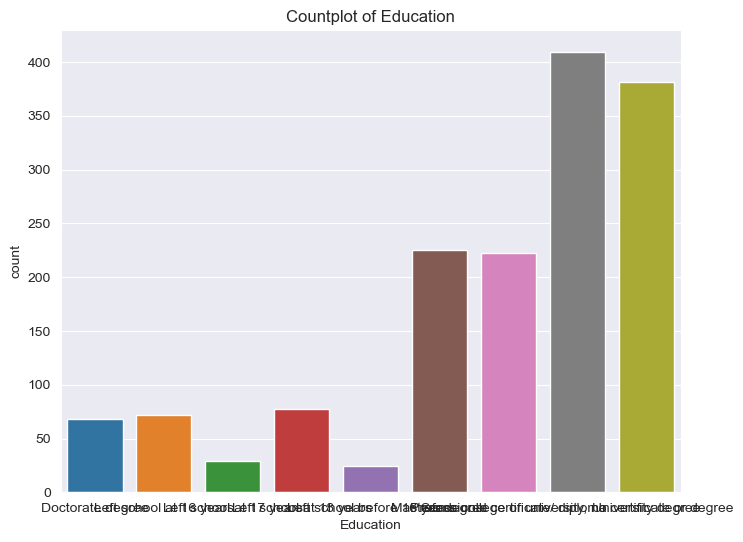

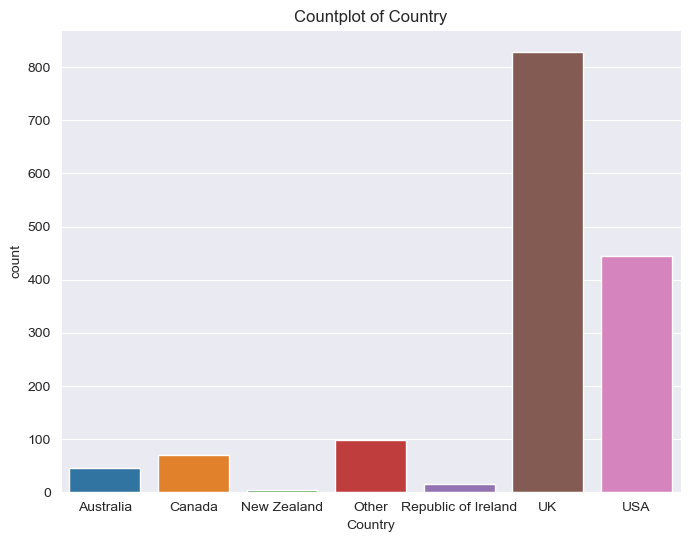

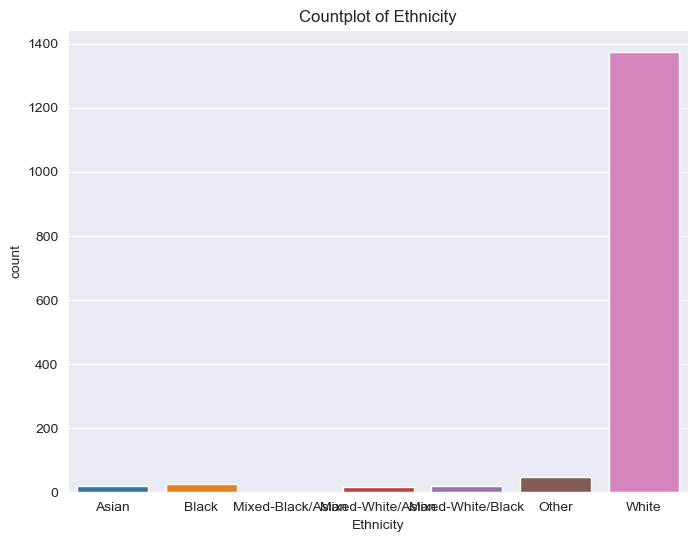

In [19]:
categorical_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=X_train)
    plt.title(f'Countplot of {feature}')
    plt.show()

Box Plots of all numerical features.

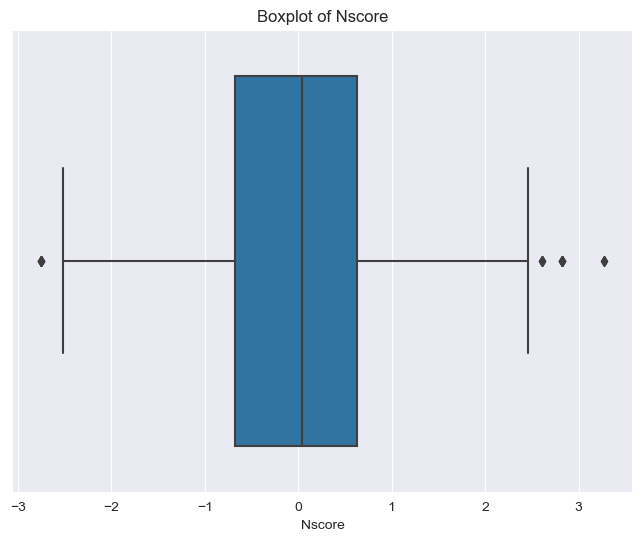

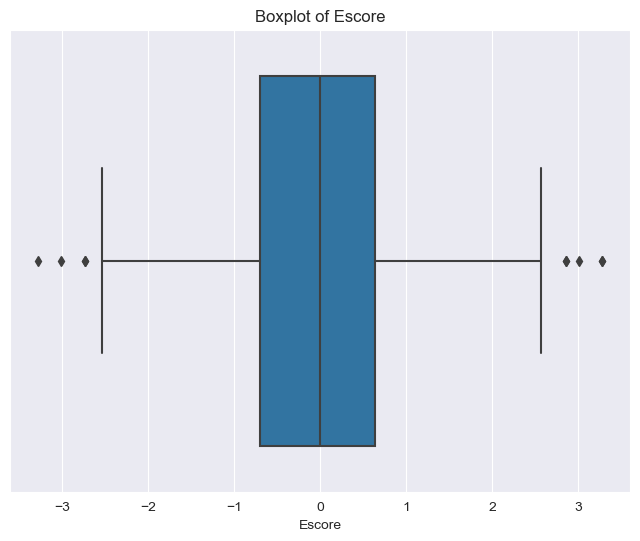

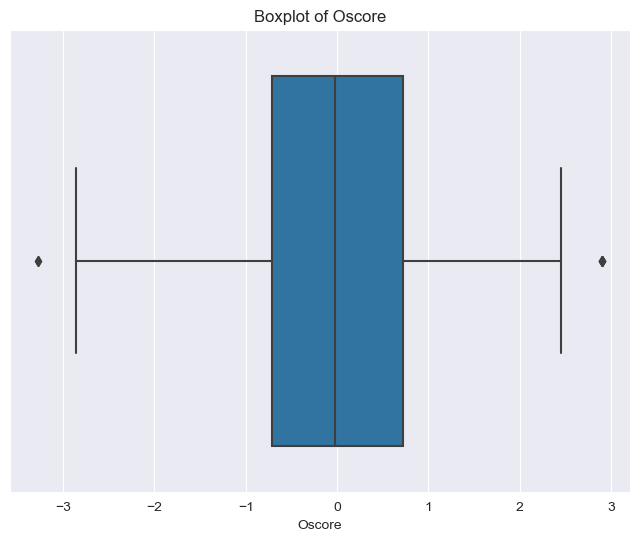

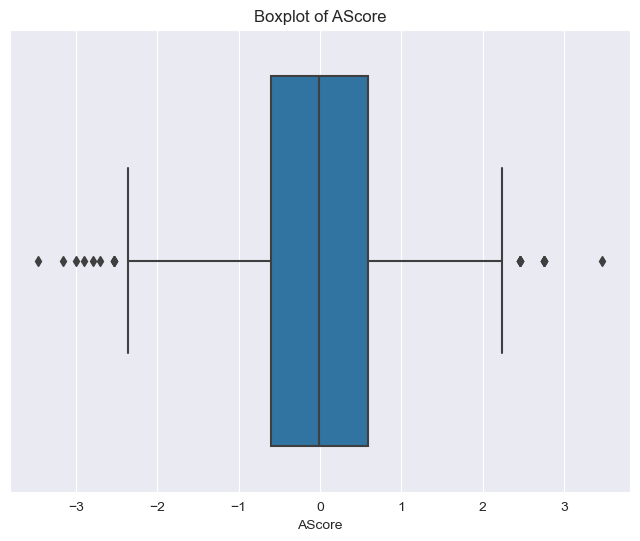

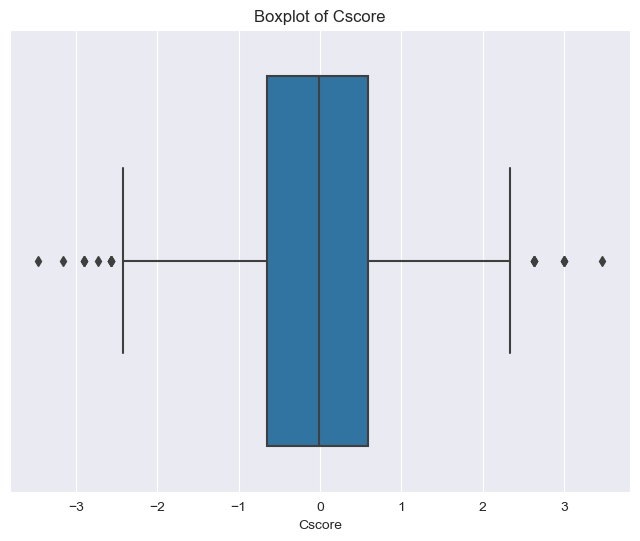

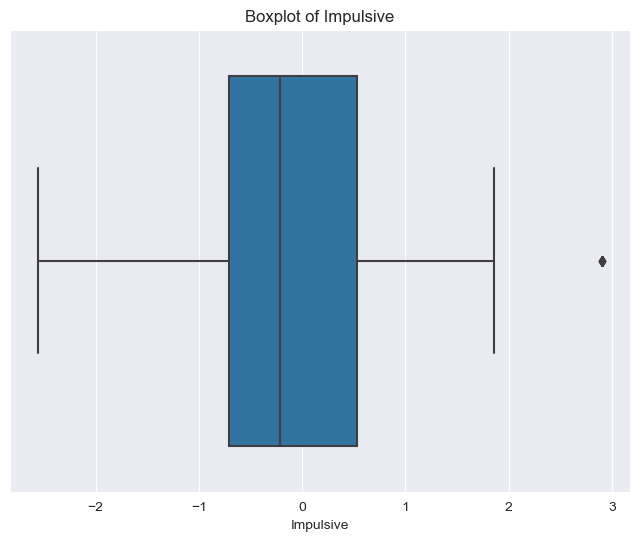

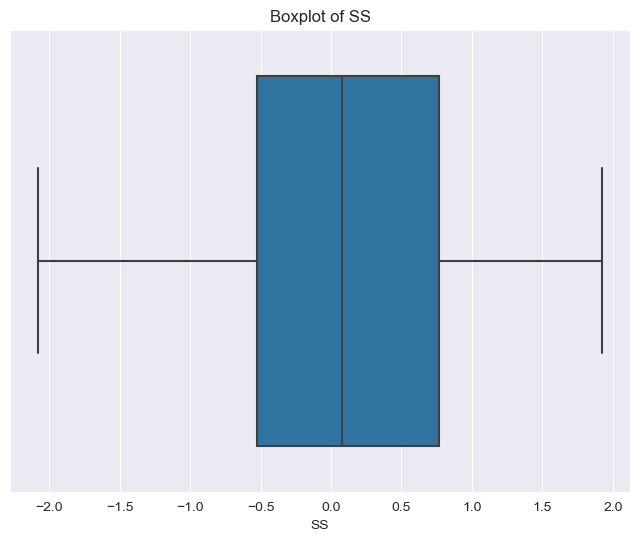

In [20]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, data=X_train)
    plt.title(f'Boxplot of {feature}')
    plt.show()

Histplots of all numerical features.

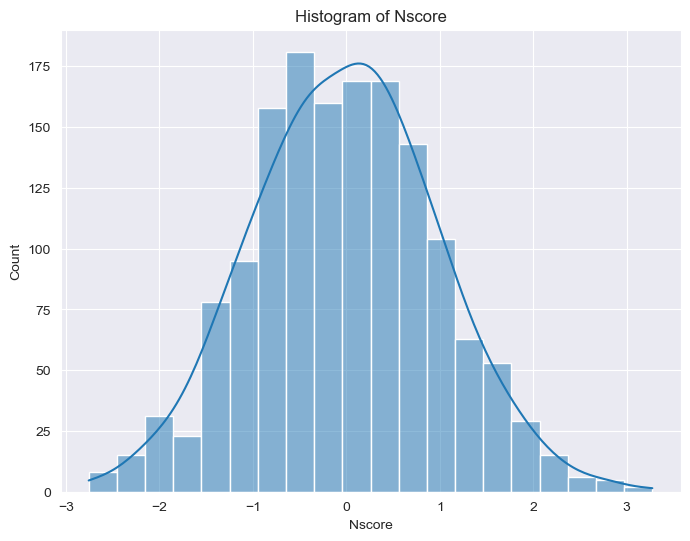

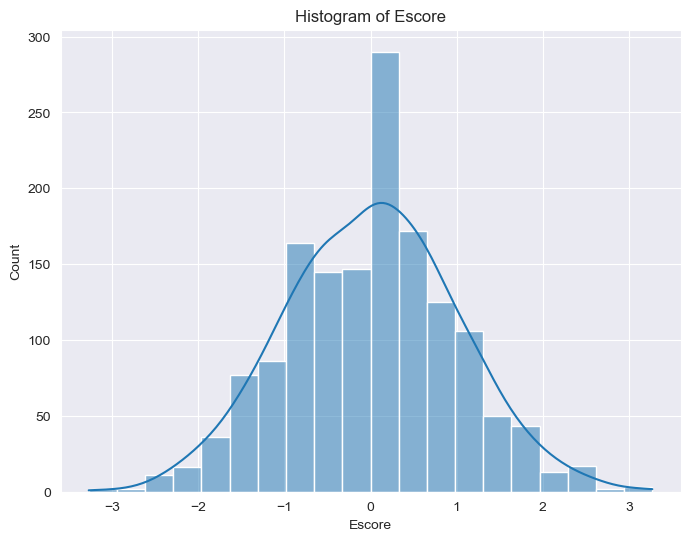

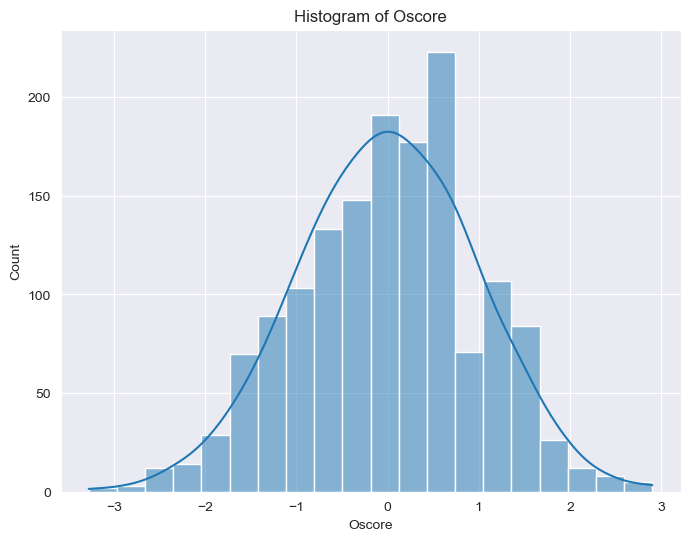

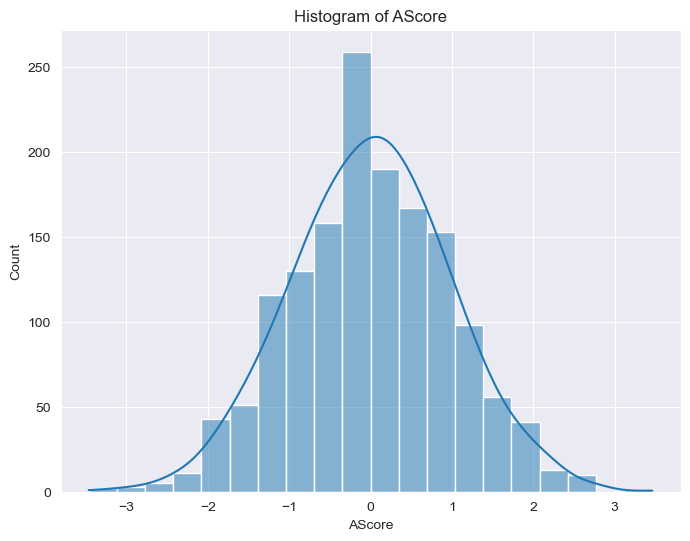

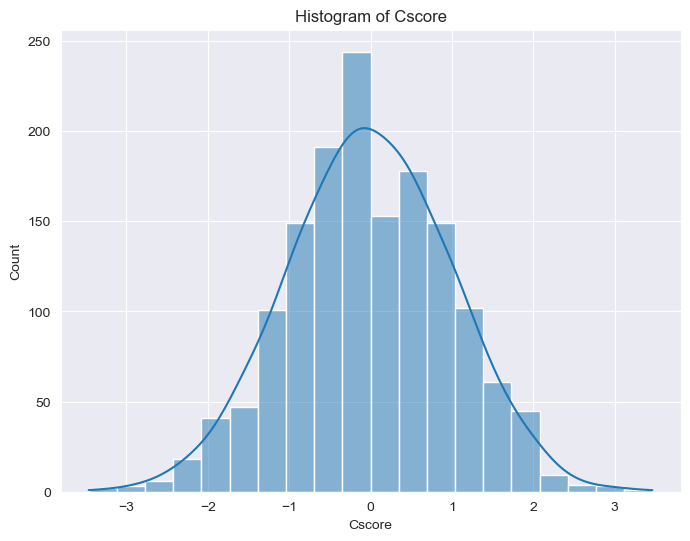

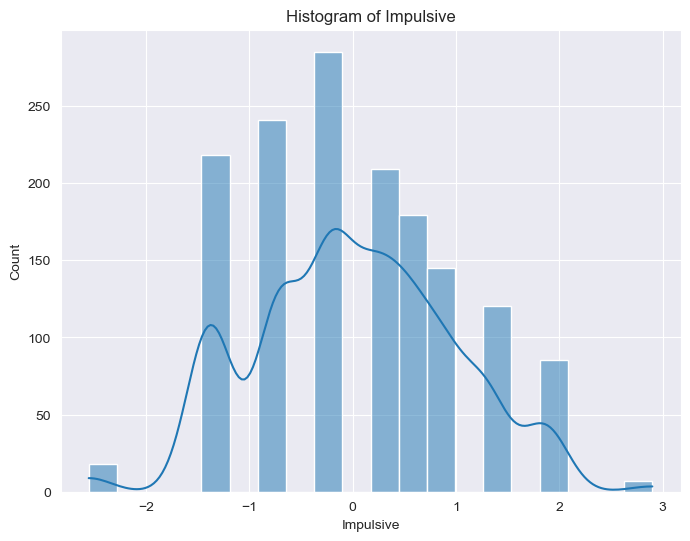

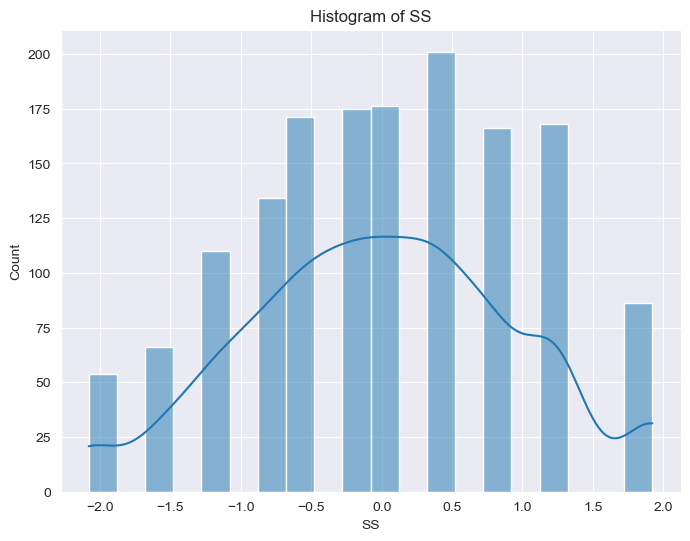

In [21]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

Third Pass

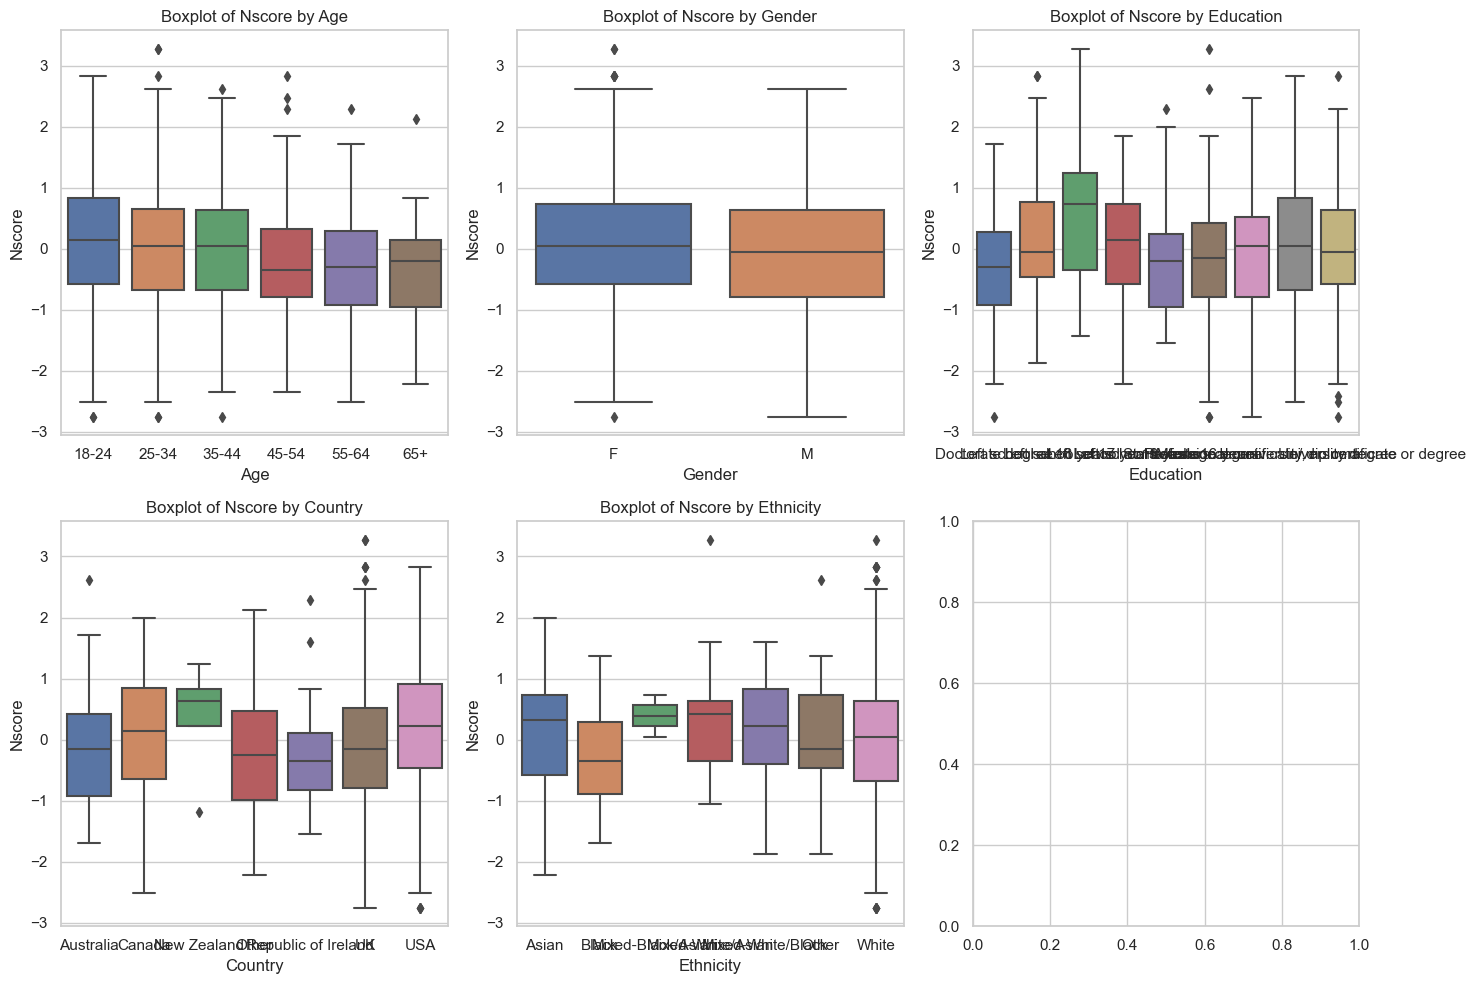

In [59]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='Nscore', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Nscore by {column}')

plt.tight_layout()
plt.show()

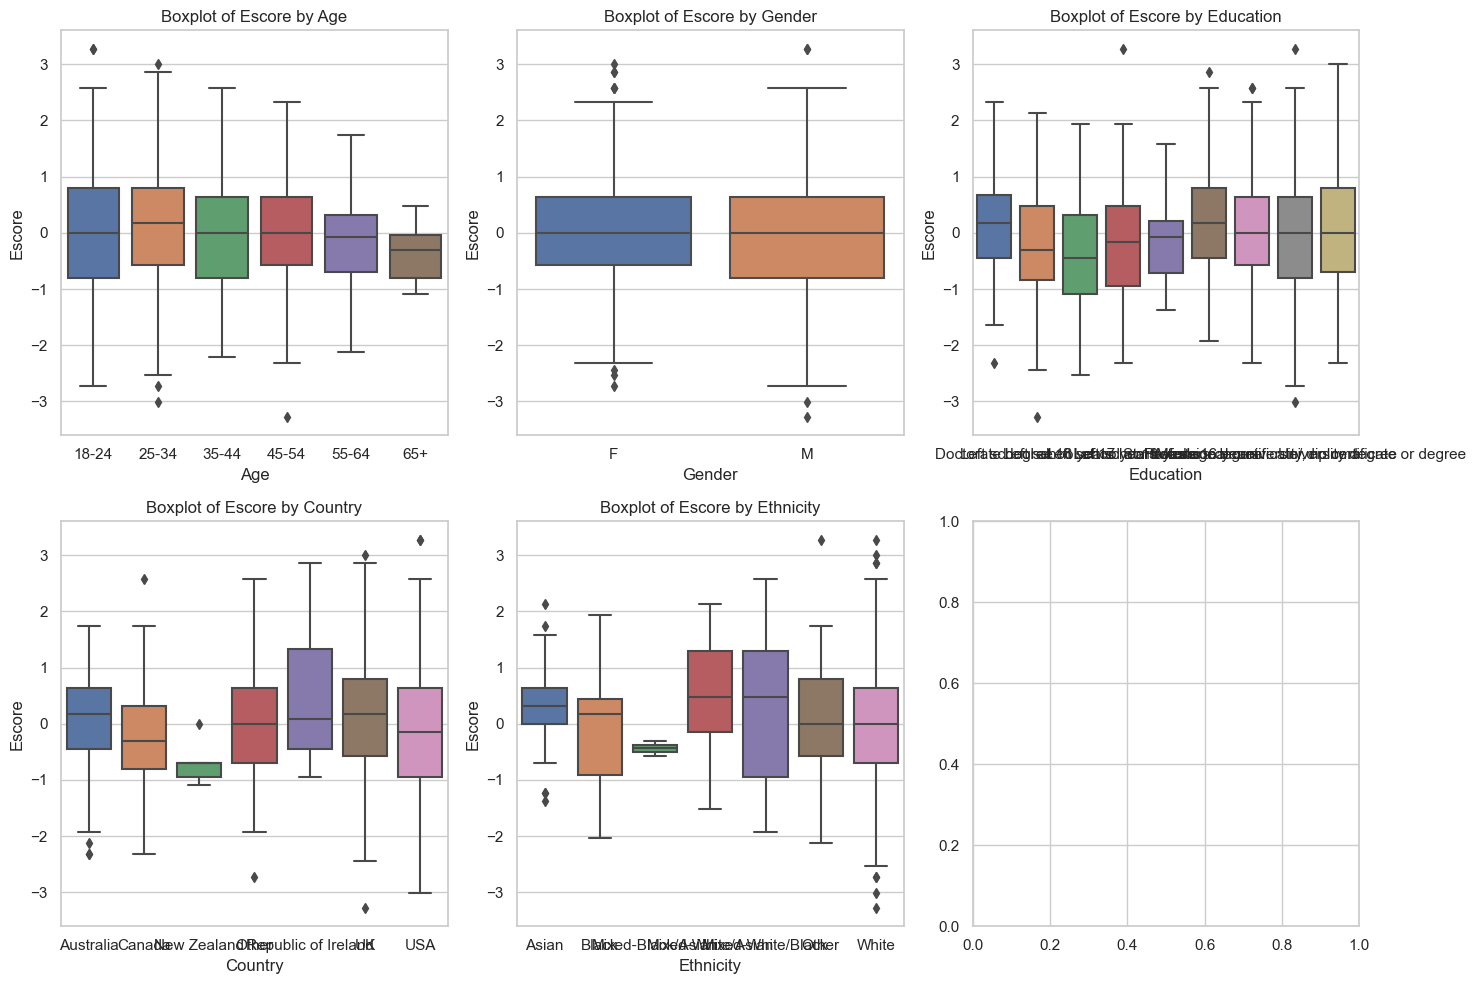

In [23]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='Escore', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Escore by {column}')

plt.tight_layout()
plt.show()

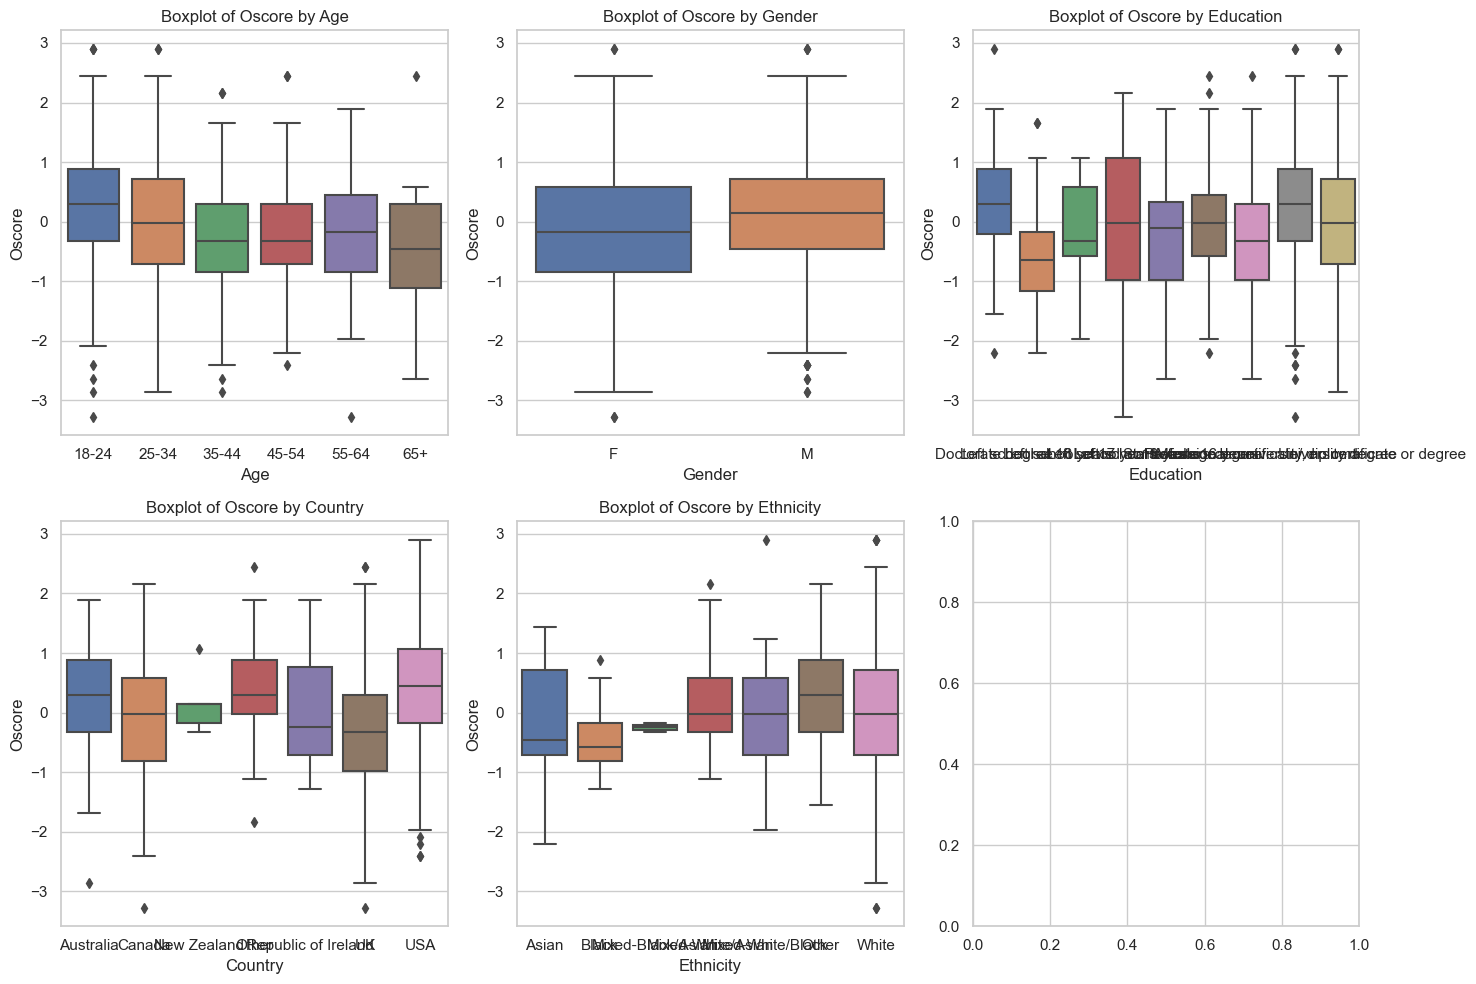

In [24]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='Oscore', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Oscore by {column}')

plt.tight_layout()
plt.show()

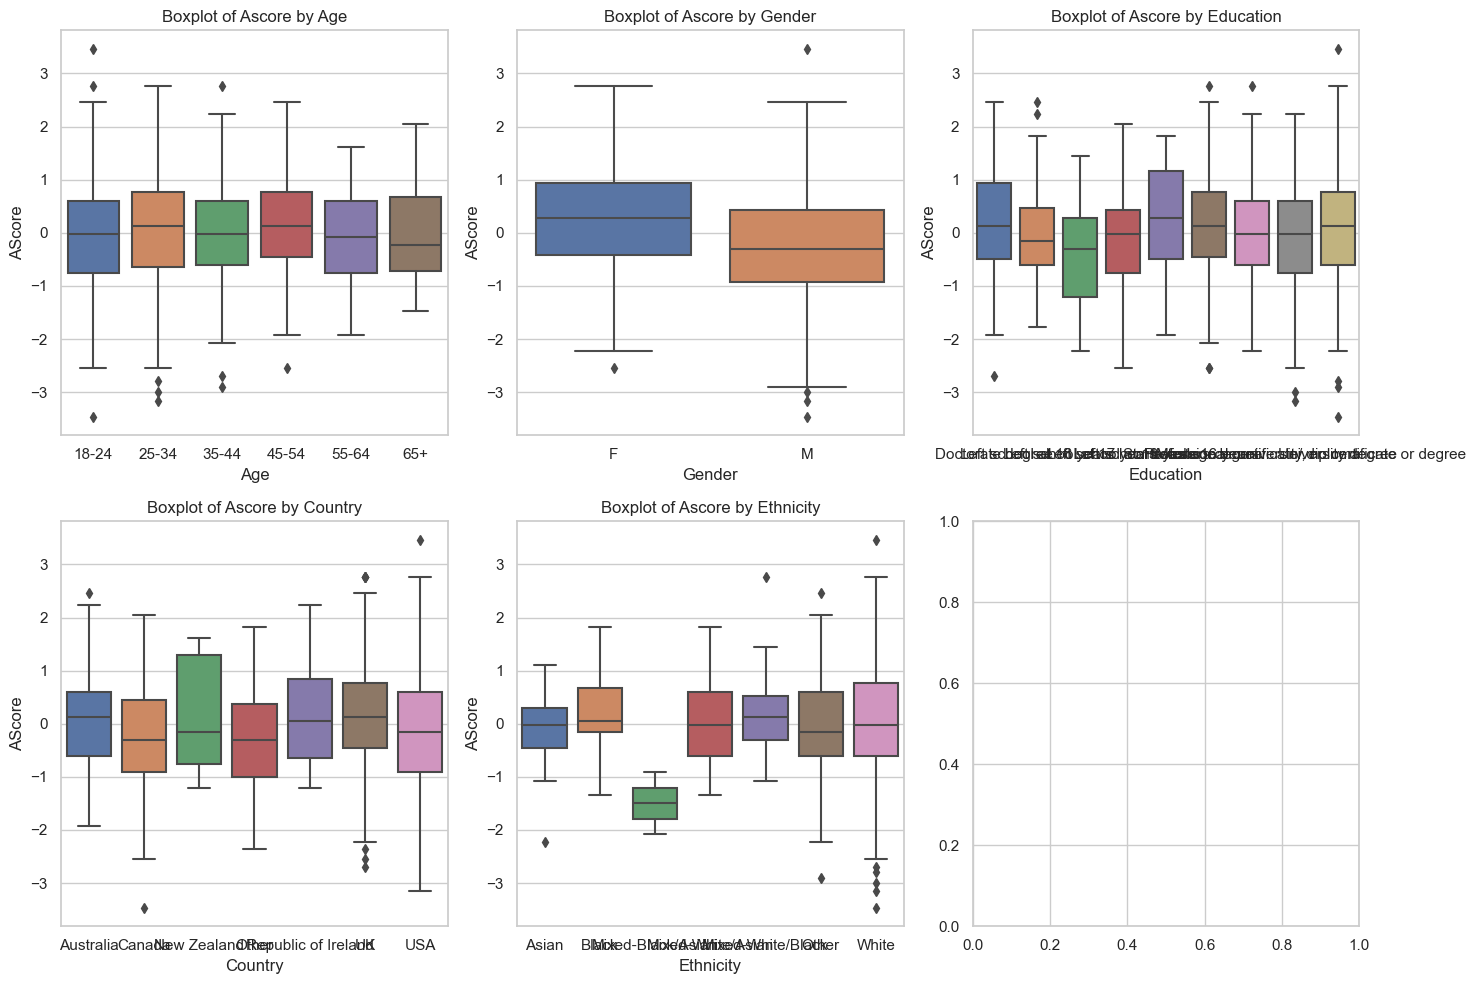

In [25]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='AScore', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Ascore by {column}')

plt.tight_layout()
plt.show()

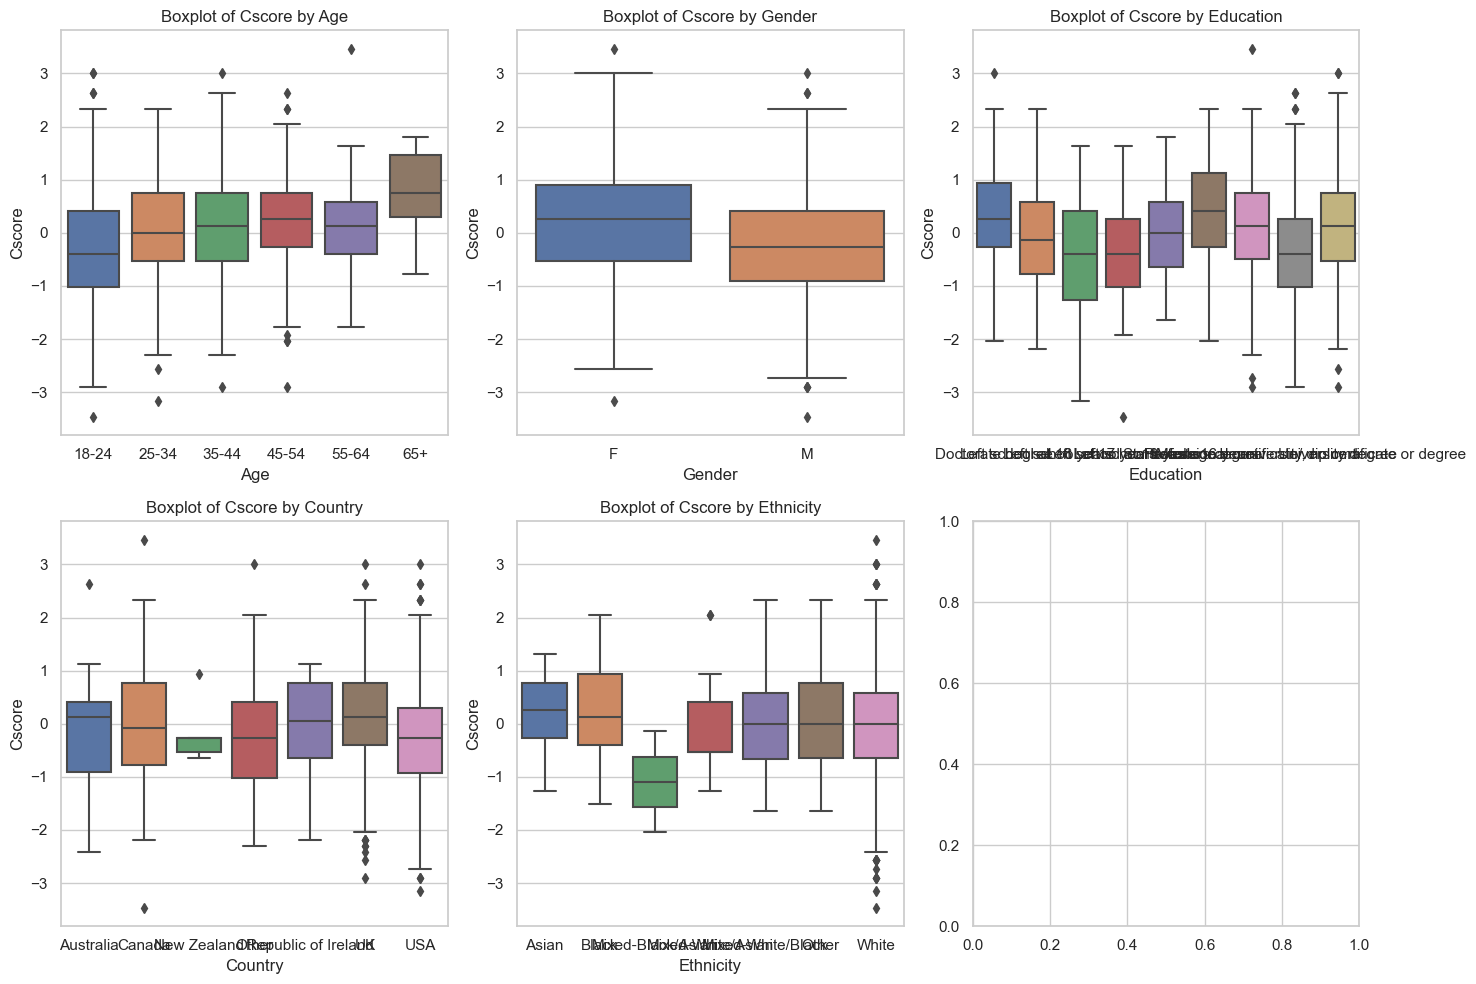

In [26]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='Cscore', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Cscore by {column}')

plt.tight_layout()
plt.show()

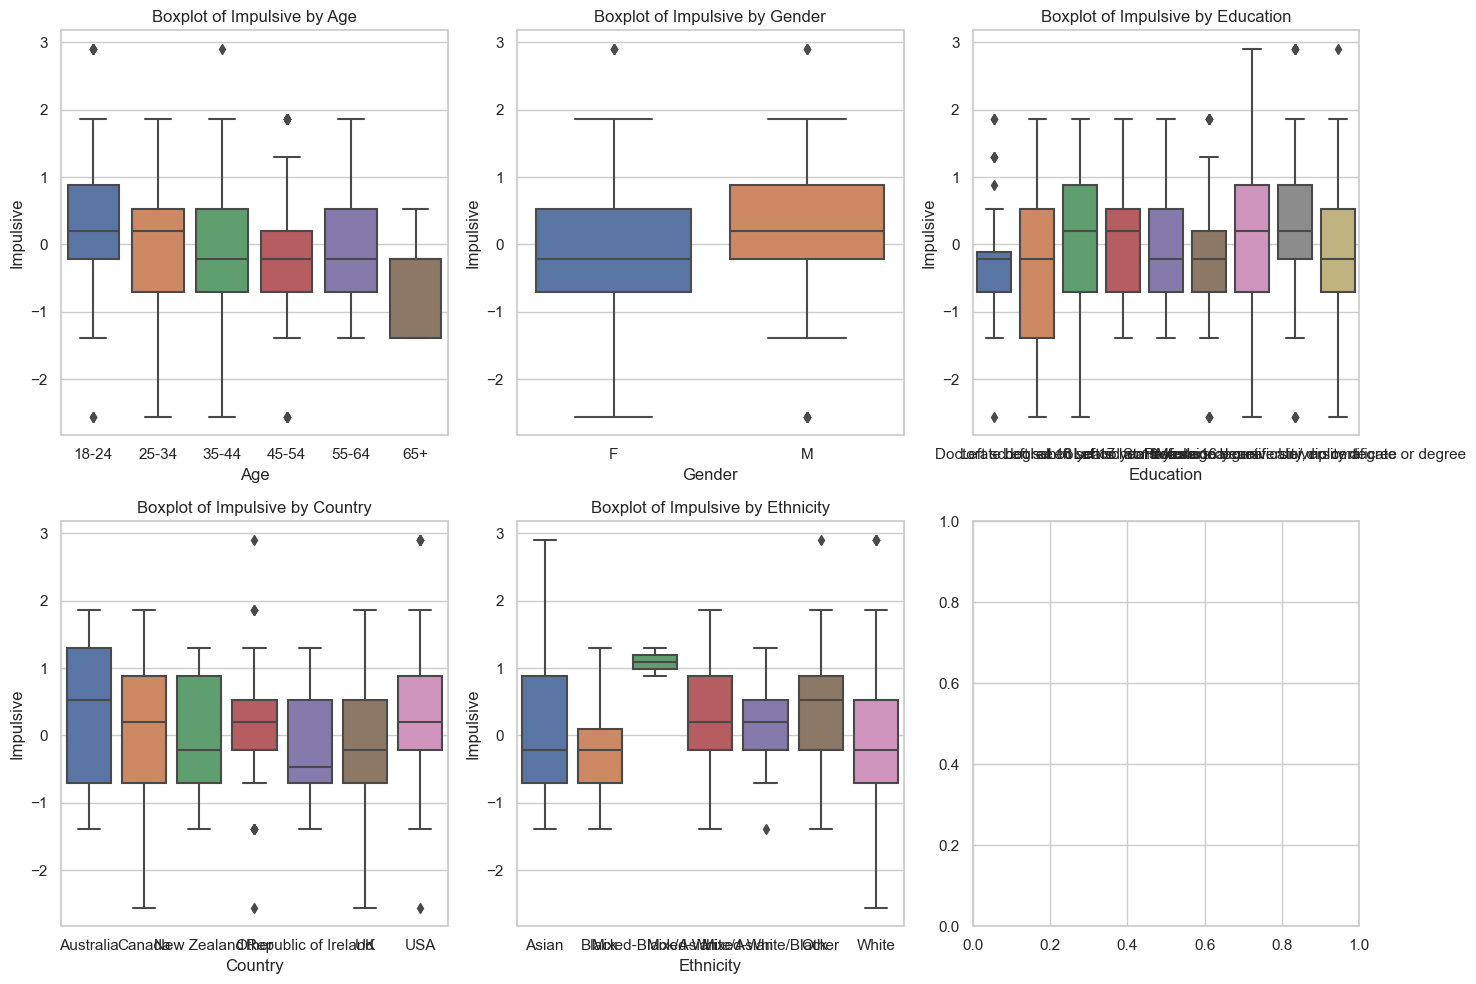

In [27]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='Impulsive', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of Impulsive by {column}')

plt.tight_layout()
plt.show()

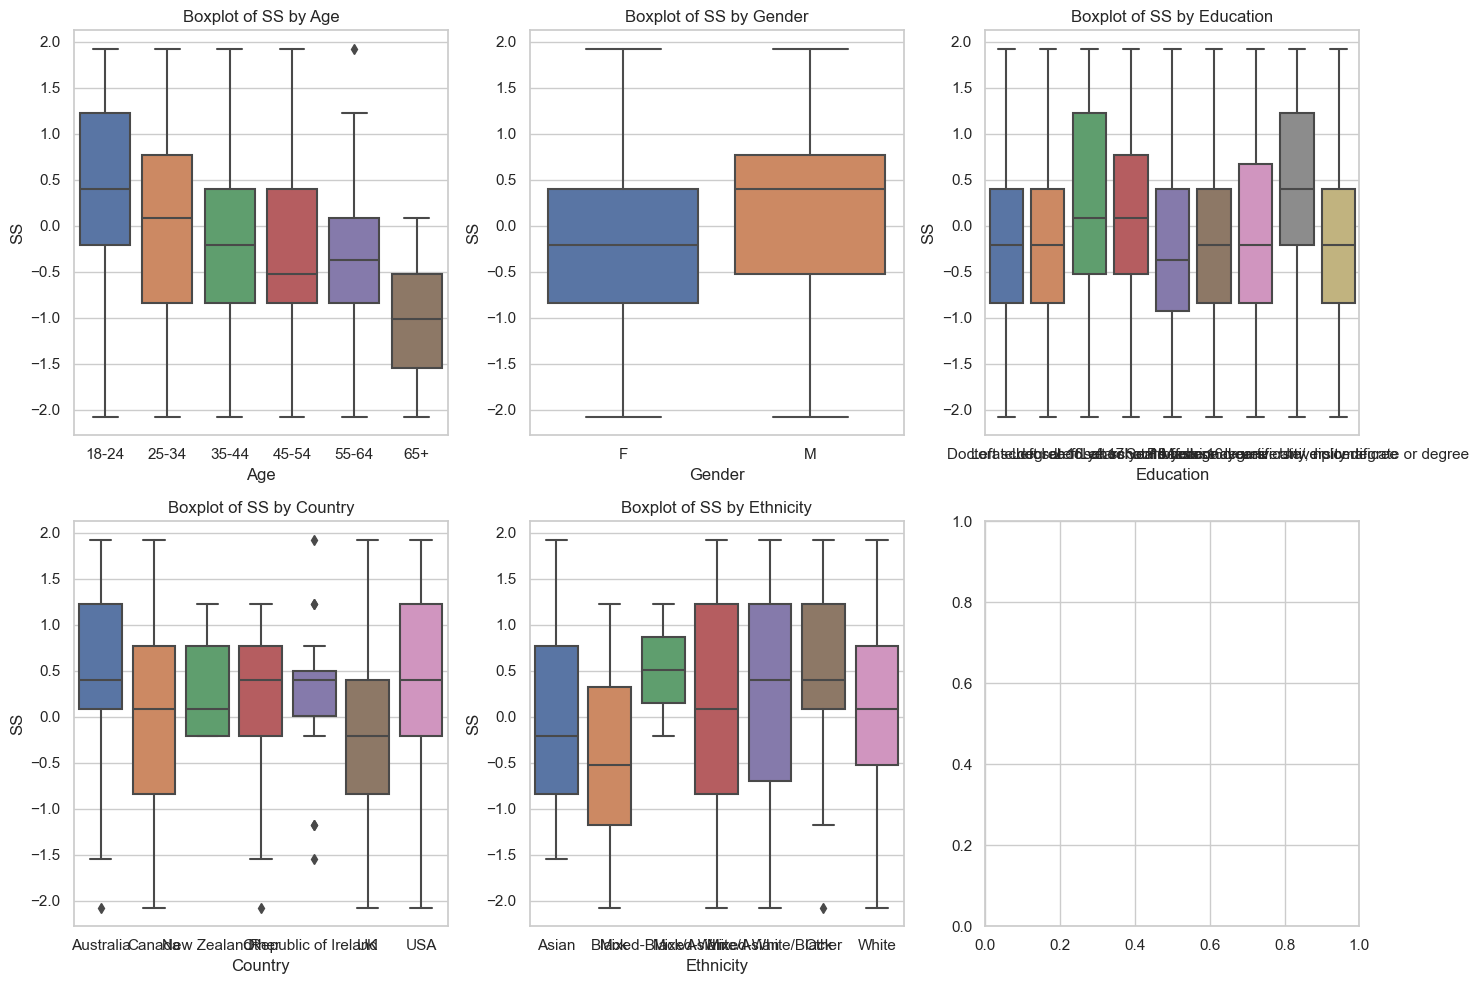

In [28]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for ease of indexing
axes = axes.flatten()   #https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

# Loop through columns and create boxplots
for i, column in enumerate(categorical_features):
    sns.boxplot(x=column, y='SS', data=X_train, ax=axes[i])
    axes[i].set_title(f'Boxplot of SS by {column}')

plt.tight_layout()
plt.show()

Checking correlation between all numberical features.

In [29]:
corr = X_train.select_dtypes(include=[np.number]).corr()
corr

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
Nscore,1.000000,-0.438832,-0.000098,-0.186852,-0.383548,0.167586,0.073167
Escore,-0.438832,1.000000,0.241460,0.151974,0.311258,0.117163,0.214053
Oscore,-0.000098,0.241460,1.000000,0.047245,-0.061751,0.282303,0.423097
AScore,-0.186852,0.151974,0.047245,1.000000,0.247320,-0.213002,-0.196462
Cscore,-0.383548,0.311258,-0.061751,0.247320,1.000000,-0.320310,-0.218867
Impulsive,0.167586,0.117163,0.282303,-0.213002,-0.320310,1.000000,0.615297
SS,0.073167,0.214053,0.423097,-0.196462,-0.218867,0.615297,1.000000


Correlation heatmap of all numerical features.

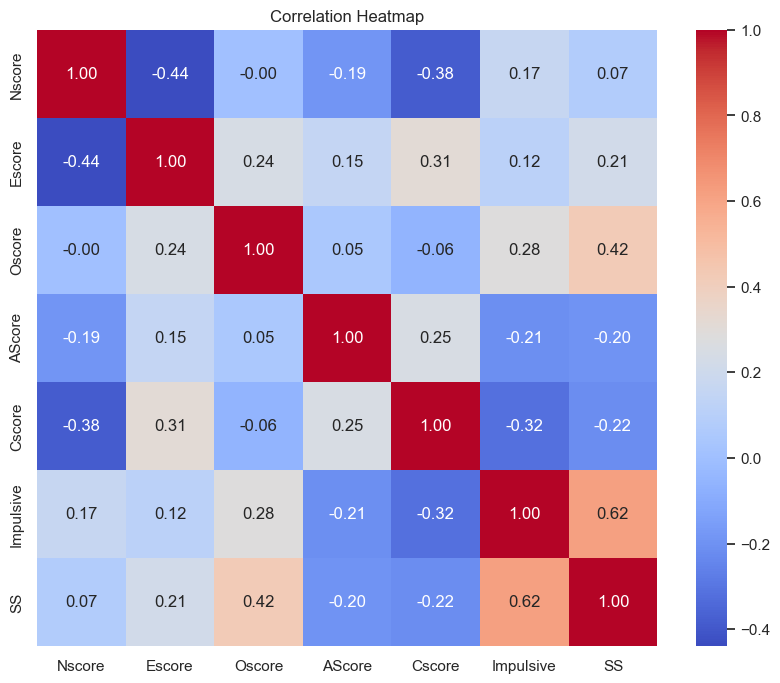

In [30]:
# Select only numeric columns from the training set
numeric_columns = X_train.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Checking correlation between all numerical features using the spearman method.

In [31]:
corr = X_train.select_dtypes(include=[np.number]).corr(method='spearman')
corr

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
Nscore,1.000000,-0.423205,0.004560,-0.183584,-0.369895,0.161948,0.084693
Escore,-0.423205,1.000000,0.219619,0.153067,0.295609,0.120660,0.197396
Oscore,0.004560,0.219619,1.000000,0.045447,-0.077276,0.277747,0.406978
AScore,-0.183584,0.153067,0.045447,1.000000,0.236044,-0.212218,-0.200778
Cscore,-0.369895,0.295609,-0.077276,0.236044,1.000000,-0.330666,-0.244234
Impulsive,0.161948,0.120660,0.277747,-0.212218,-0.330666,1.000000,0.620790
SS,0.084693,0.197396,0.406978,-0.200778,-0.244234,0.620790,1.000000


Correlation heatmap of all numerical features using the spearman method.

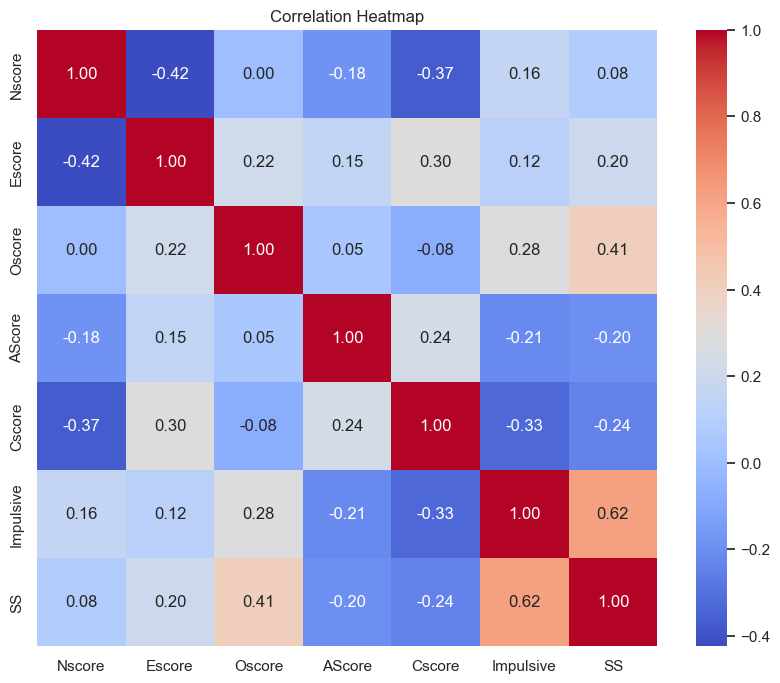

In [32]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation heatmap of both categorical and numerical features using phi-k.

<Axes: title={'center': 'Correlation Heatmap'}>

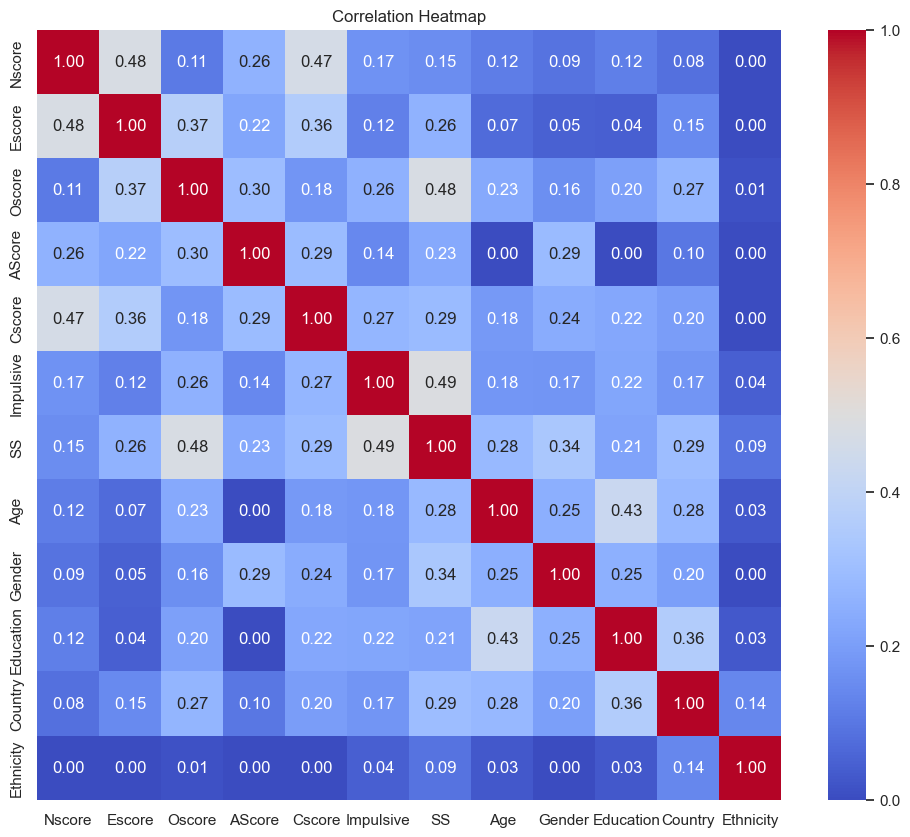

In [33]:
import phik

X_train_numeric = X_train.select_dtypes(include=[np.number])

X_train_categorical = X_train.select_dtypes(exclude=[np.number])

# Combine both numeric and categorical features
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)

correlation_matrix = X_train_combined.phik_matrix(interval_cols=X_train_numeric.columns)
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

##End of Answer 1##

# Task 2: For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use.

##Start of Answer 2##

Encoding categorical features using one hot encode.

In [34]:
# One-hot encode categorical columns with specified columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features)

# Setting the same set of dummy variables in both data sets
common_columns = list(set(X_train_encoded.columns) & set(X_test_encoded.columns))

# Use only the common set of columns
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

In [35]:
# Extract the 'Alcohol' column
y_train_alcohol = y_train['Alcohol']
y_test_alcohol = y_test['Alcohol']

Encoding alcohol target with label encoder

In [36]:
# Encode the 'Alcohol' column
label_encoder = LabelEncoder()
y_train_alcohol_encoded = label_encoder.fit_transform(y_train_alcohol)
y_test_alcohol_encoded = label_encoder.fit_transform(y_test_alcohol)

Decision tree and random forest classifiers.

In [41]:
# Model Selection
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train_alcohol_encoded)

# Random Forest Classifier (alternative)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train_alcohol_encoded)

RandomForestClassifier(random_state=42)

In [63]:
# Model Evaluation
# Decision Tree
dt_predictions = dt_classifier.predict(X_test_encoded)
dt_accuracy = accuracy_score(y_test_alcohol_encoded, dt_predictions)
dt_classification_report = classification_report(y_test_alcohol_encoded, dt_predictions)

# Random Forest (alternative)
rf_predictions = rf_classifier.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test_alcohol_encoded, rf_predictions)
rf_classification_report = classification_report(y_test_alcohol_encoded, rf_predictions)

# Print the results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:")
print(dt_classification_report)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_report)

Decision Tree Classifier:
Accuracy: 0.023872679045092837
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.83      0.03         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.06      0.02      0.04        41
           4       0.00      0.00      0.00        60
           5       0.50      0.02      0.04       154
           6       0.00      0.00      0.00        95

    accuracy                           0.02       377
   macro avg       0.08      0.13      0.01       377
weighted avg       0.21      0.02      0.02       377


Random Forest Classifier:
Accuracy: 0.015915119363395226
Classification Report:
              precision    recall  f1-score   support

           0       0.02      1.00      0.03         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.00  

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier:
Accuracy: The overall accuracy of the model on the test dataset is 0.2493.

Classification Report:

Precision: Indicates the accuracy of the positive predictions. For example, for class 0, precision is 0.00, which means that none of the instances predicted as class 0 were actually class 0 and for class 6 this indicates that when the model predicts an instance as class 6, it is correct 21% of the time.

Recall: Indicates the ability of the classifier to capture all the relevant instances of a class. For class 0, recall is 0.00, meaning that the classifier did not correctly identify any instances of class 0 and out of all actual instances belonging to class 6, the model correctly identifies 20%.

F1-score: A metric that combines precision and recall into a single value. For class 0, the F1-score is 0.00 and for class 6 its 0.21
Support: 6 instances of class 0 are present in the test dataset and 95 instances of class 6 are present.

Macro Avg: The macro-average is the average of the metrics (precision, recall, F1-score) calculated independently for each class. In this case, the macro-average precision, recall, and F1-score are each 0.14.

Weighted Avg: The weighted average is the average of the metrics, where each class's contribution is weighted by its support (the number of instances). In this case, the weighted average precision, recall, and F1-score are each around 0.26.

Random Forest Classifier:
Accuracy: The overall accuracy of the model on the test dataset is 0.3634.

Classification Report:

Precision: for class 0, precision is 0.00, which means that none of the instances predicted as class 0 were actually class 0 and for class 6 this indicates that when the model predicts an instance as class 6, it is correct 22% of the time.

Recall: For class 0, recall is 0.00, meaning that the classifier did not correctly identify any instances of class 0 and out of all actual instances belonging to class 6, the model correctly identifies 16%.

F1-score: A metric that combines precision and recall into a single value. For class 0, the F1-score is 0.00 and for class 6 its 0.18
Support: 6 instances of class 0 are present in the test dataset and 95 instances of class 6 are present.

The macro average is 0.15, 0.14, and 0.12.

The weighted average is 0.28, 0.36, and 0.29.

Conclusion:
Both models have relatively low overall accuracy.
The classification reports provide a more detailed view, showing how well each individual class is predicted.
It's important to consider the problem domain and the specific requirements when interpreting these metrics. The low precision, recall, and F1-score for certain classes indicate that the models may have difficulty accurately predicting those classes.
These results suggest that further model tuning or use of different classification models would improve performance.

##End of Answer 2##

# Task 3: Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why?

##Start of Answer 3##

Caffeine

In [45]:
# Extract the 'Caffeine' column
y_train_caffeine = y_train['Caff']
y_test_caffeine = y_test['Caff']

In [46]:
# Encode the 'Caffeine' column
label_encoder = LabelEncoder()
y_train_caffeine_encoded = label_encoder.fit_transform(y_train_caffeine)
y_test_caffeine_encoded = label_encoder.fit_transform(y_test_caffeine)

In [47]:
# Model Selection
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train_caffeine_encoded)

# Random Forest Classifier (alternative)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train_caffeine_encoded)

RandomForestClassifier(random_state=42)

In [48]:
# Model Evaluation
# Decision Tree
dt_predictions = dt_classifier.predict(X_test_encoded)
dt_accuracy = accuracy_score(y_test_caffeine_encoded, dt_predictions)
dt_classification_report = classification_report(y_test_caffeine_encoded, dt_predictions)

# Random Forest (alternative)
rf_predictions = rf_classifier.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test_caffeine_encoded, rf_predictions)
rf_classification_report = classification_report(y_test_caffeine_encoded, rf_predictions)

# Print the results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:")
print(dt_classification_report)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_report)

Decision Tree Classifier:
Accuracy: 0.5464190981432361
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        13
           4       0.04      0.04      0.04        24
           5       0.23      0.28      0.25        50
           6       0.74      0.69      0.72       275

    accuracy                           0.55       377
   macro avg       0.14      0.15      0.14       377
weighted avg       0.57      0.55      0.56       377


Random Forest Classifier:
Accuracy: 0.7294429708222812
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.00      

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier:
Accuracy: 55.44%

Classification Report:

Class 6 has the highest precision, recall, and F1-score, indicating that the model performs well in predicting this class.
Classes 3 and 5 have low precision, recall, and F1-score, suggesting that the model struggles to predict these classes accurately.
Other classes show varying degrees of performance.

Random Forest Classifier:
Accuracy: 72.94%

Classification Report:
Precision, Recall, F1-Score, and Support: Similar interpretation as in the Decision Tree Classifier.
For each class (0 to 6):
Class 6 again has high precision, recall, and F1-score.
Other classes, especially 0, 1, 2, 3, 4, and 5, show improvements compared to the Decision Tree Classifier.

Conclusion:
The Random Forest Classifier outperforms the Decision Tree Classifier in terms of accuracy and, in many cases, precision, recall, and F1-score.
Both models have challenges predicting certain classes, as shown by low scores for those classes in the classification reports.
In conclusion, the Random Forest Classifier seems to provide better results in this context.

Cocaine 

In [49]:
# Extract the 'Cocaine' column
y_train_cocaine = y_train['Coke']
y_test_cocaine = y_test['Coke']

In [50]:
# Encode the 'Cocaine' column
label_encoder = LabelEncoder()
y_train_cocaine_encoded = label_encoder.fit_transform(y_train_cocaine)
y_test_cocaine_encoded = label_encoder.fit_transform(y_test_cocaine)

In [51]:
# Model Selection
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train_cocaine_encoded)

# Random Forest Classifier (alternative)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train_cocaine_encoded)

RandomForestClassifier(random_state=42)

In [52]:
# Model Evaluation
# Decision Tree
dt_predictions = dt_classifier.predict(X_test_encoded)
dt_accuracy = accuracy_score(y_test_cocaine_encoded, dt_predictions)
dt_classification_report = classification_report(y_test_cocaine_encoded, dt_predictions)

# Random Forest (alternative)
rf_predictions = rf_classifier.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test_cocaine_encoded, rf_predictions)
rf_classification_report = classification_report(y_test_cocaine_encoded, rf_predictions)

# Print the results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:")
print(dt_classification_report)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_report)

Decision Tree Classifier:
Accuracy: 0.4509283819628647
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       213
           1       0.23      0.25      0.24        32
           2       0.26      0.28      0.27        50
           3       0.22      0.22      0.22        51
           4       0.05      0.04      0.04        24
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2

    accuracy                           0.45       377
   macro avg       0.20      0.20      0.20       377
weighted avg       0.46      0.45      0.46       377


Random Forest Classifier:
Accuracy: 0.5994694960212201
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       213
           1       0.53      0.25      0.34        32
           2       0.38      0.20      0.26        50
           3       0.32      

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier:
Accuracy: 44.56%

Classification Report:

Class 0 (Support: 213):
The model has reasonably high precision and recall for this class, indicating that it can predict class 0 with relatively good accuracy.
Class 1 (Support: 32):
The model has lower precision and recall for this class, suggesting that it struggles to predict class 1 accurately.
Classes 2 to 6 (Support: 2 to 50):
The model has very low precision, recall, and F1-score for these classes, indicating poor performance.

Random Forest Classifier:
Accuracy: 58.62%

Classification Report:
Precision, Recall, F1-Score, and Support: Similar interpretation as in the Decision Tree Classifier.
For each class (0 to 6):

Class 0 (Support: 213):
The Random Forest model performs better than the Decision Tree model, with higher precision, recall, and F1-score.
Class 1 (Support: 32):
The Random Forest model also shows improvement over the Decision Tree model for class 1.
Classes 2 to 6 (Support: 2 to 50):
Similar to the Decision Tree model, the Random Forest model struggles to predict these classes, as evidenced by low precision, recall, and F1-score.

Conclusion:
The Random Forest Classifier provides better results than the Decision Tree Classifier in terms of accuracy and, in many cases, precision, recall, and F1-score.
Both models have challenges predicting certain classes, especially those with lower support.

Heroin

In [53]:
# Extract the 'Heroin' column
y_train_heroin = y_train['Heroin']
y_test_heroin = y_test['Heroin']

In [54]:
# Encode the 'Heroin' column
label_encoder = LabelEncoder()
y_train_heroin_encoded = label_encoder.fit_transform(y_train_heroin)
y_test_heroin_encoded = label_encoder.fit_transform(y_test_heroin)

In [55]:
# Model Selection
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train_heroin_encoded)

# Random Forest Classifier (alternative)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train_heroin_encoded)

RandomForestClassifier(random_state=42)

In [56]:
# Model Evaluation
# Decision Tree
dt_predictions = dt_classifier.predict(X_test_encoded)
dt_accuracy = accuracy_score(y_test_heroin_encoded, dt_predictions)
dt_classification_report = classification_report(y_test_heroin_encoded, dt_predictions)

# Random Forest (alternative)
rf_predictions = rf_classifier.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test_heroin_encoded, rf_predictions)
rf_classification_report = classification_report(y_test_heroin_encoded, rf_predictions)

# Print the results
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print("Classification Report:")
print(dt_classification_report)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_classification_report)

Decision Tree Classifier:
Accuracy: 0.7294429708222812
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       321
           1       0.00      0.00      0.00        17
           2       0.08      0.13      0.10        15
           3       0.06      0.07      0.06        15
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.73       377
   macro avg       0.15      0.15      0.15       377
weighted avg       0.75      0.73      0.74       377


Random Forest Classifier:
Accuracy: 0.8541114058355438
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       321
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        15
           3       0.50      

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier:
Accuracy: 0.724 (72.4%)

Classification Report:
For class 0, precision is 0.87, recall is 0.84, and F1-score is 0.86. This indicates a high ability to correctly identify class 0 instances.
For other classes (1 to 6), precision, recall, and F1-score are all close to zero, suggesting poor performance in identifying these classes.
The overall weighted average is 0.73, indicating a decent overall performance, but it may be driven by the high accuracy in predicting class 0.

Random Forest Classifier:
Accuracy: 0.854 (85.4%)

Classification Report:
For class 0, precision is 0.86, recall is 1.00, and F1-score is 0.92. This indicates high accuracy, recall, and F1-score for class 0.
For class 3, precision is 0.50, recall is 0.07, and F1-score is 0.12. This suggests that the model struggles to correctly identify class 3 instances.
The overall weighted average is 0.79, indicating good overall performance, with a particular emphasis on the accuracy in predicting class 0.

Conclusion:
The Random Forest Classifier generally outperforms the Decision Tree Classifier in terms of accuracy, precision, recall, and F1-score.
Both models seem to struggle with classes 1 to 6, with low precision, recall, and F1-score values for those classes.
The macro and weighted averages provide an overall assessment of the models, considering all classes. The Random Forest Classifier generally performs better across these averages, reflecting its higher overall accuracy.
In conclusion, the Random Forest Classifier is the better-performing model in this case, as it achieves higher accuracy and better precision, recall, and F1-scores across most classes.

##End of Answer 3##

# Task 4: Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study.

##Start of Answer 4##

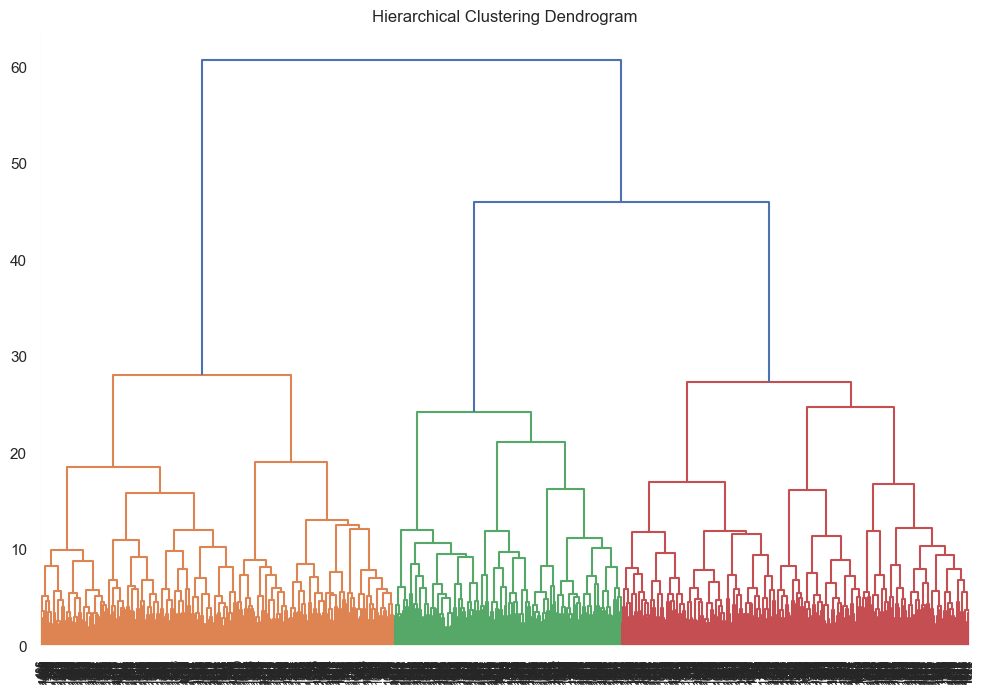

In [57]:
import scipy.cluster.hierarchy as sch

# Calculating the linkage matrix
linkage_matrix = sch.linkage(X_train_encoded, method='ward', metric='euclidean')

#dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=X_train.index, orientation='top', leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In this dendrogram, each vertical line represents a user in the drug consumption study. At the top of the dendrogram there is high dissimilarity between the clusters and towards the bottom of the dendrogram the clusters become more similiar.

##End of Answer 4##